Nama : Anggun Lisnawati

Nim : 211351

Kelas : Malam B

# IMPORT DATASET

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anggunlisnawati","key":"c1cb8146f3c89757af7db77c5235f892"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d carrie1/ecommerce-data

  0% 0.00/7.20M [00:00<?, ?B/s]
100% 7.20M/7.20M [00:00<00:00, 112MB/s]


In [4]:
!mkdir ecommerce-data
!unzip ecommerce-data.zip -d ecommerce-data
!ls ecommerce-data

Archive:  ecommerce-data.zip
  inflating: ecommerce-data/data.csv  
data.csv


# IMPORT LIBRARY YANG DI PAKAI

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('/content/ecommerce-data/data.csv',encoding="ISO-8859-1")

# DATA DISCOVERY

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
df.shape

(541909, 8)

In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [12]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

In [13]:
df.duplicated().sum()

5268

# EDA

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: Description, dtype: int64


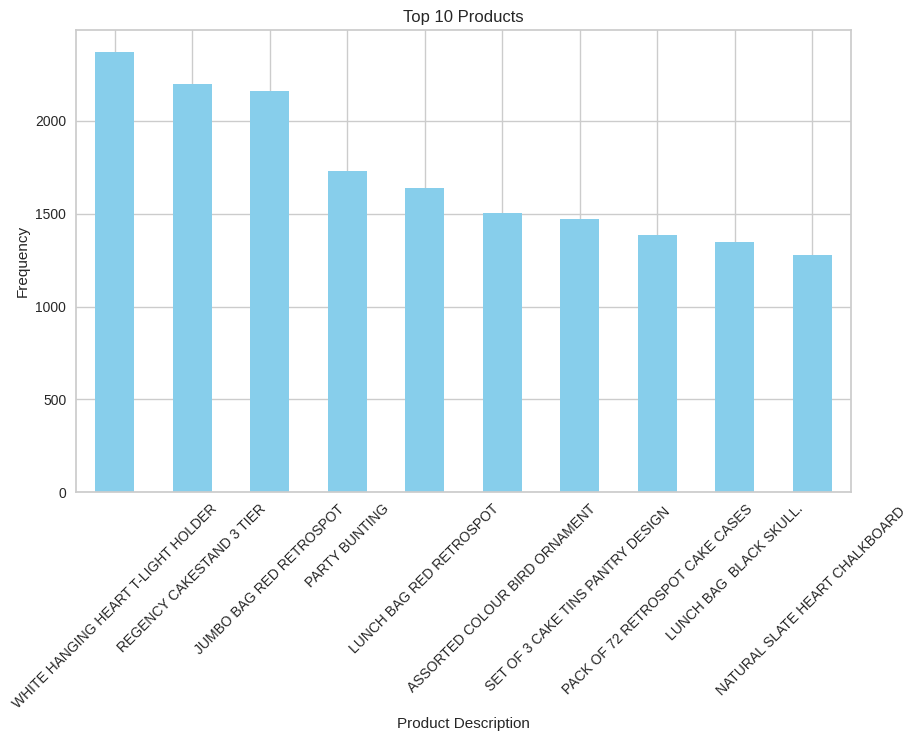

In [14]:
top_10_products = df['Description'].value_counts().head(10)
print(top_10_products)

# Menampilkan diagram batang untuk 10 produk teratas
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products')
plt.xlabel('Product Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

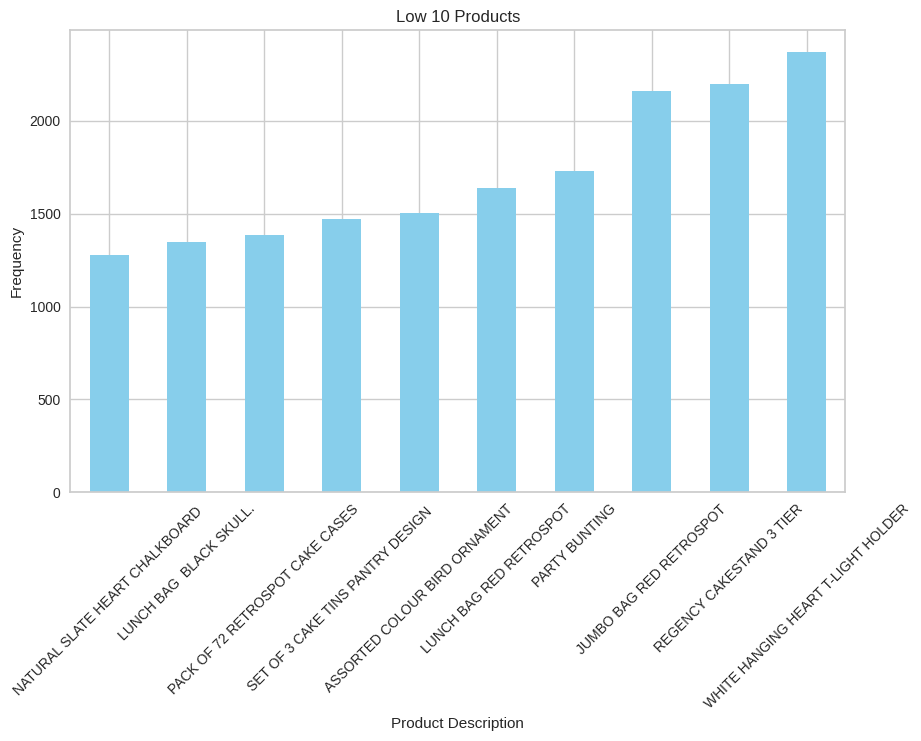

In [15]:
low_10_products = df['Description'].value_counts().head(10)
# Selecting the bottom 10 products (least sold)
low_10_products = low_10_products.nsmallest(10)

# Menampilkan diagram batang untuk 10 produk teratas
plt.figure(figsize=(10, 6))
low_10_products.plot(kind='bar', color='skyblue')
plt.title('Low 10 Products')
plt.xlabel('Product Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: Country, dtype: int64


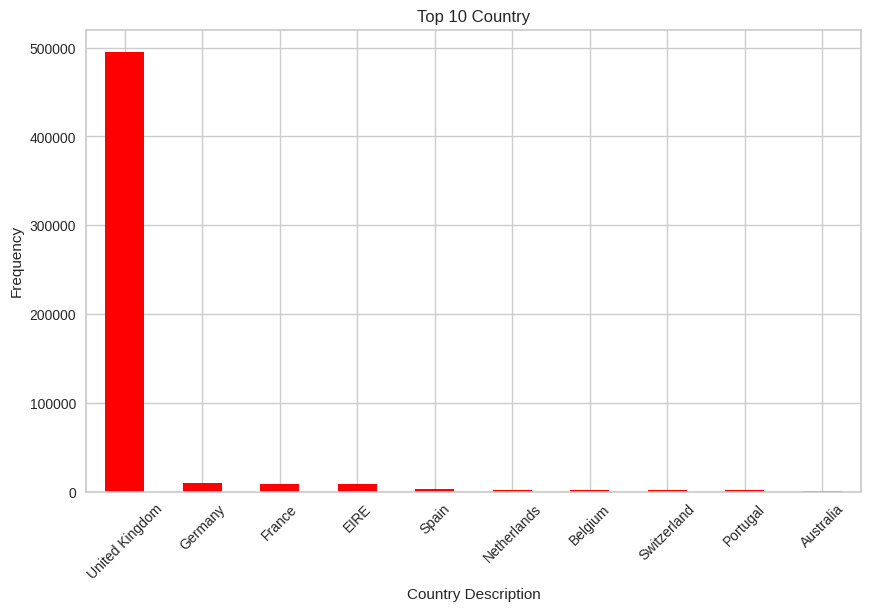

In [16]:
top_10_country = df['Country'].value_counts().head(10)
print(top_10_country)

# Menampilkan diagram batang untuk 10 produk teratas
plt.figure(figsize=(10, 6))
top_10_country.plot(kind='bar', color='red')
plt.title('Top 10 Country')
plt.xlabel('Country Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
15311.0    2491
14646.0    2085
13089.0    1857
13263.0    1677
14298.0    1640
Name: CustomerID, dtype: int64


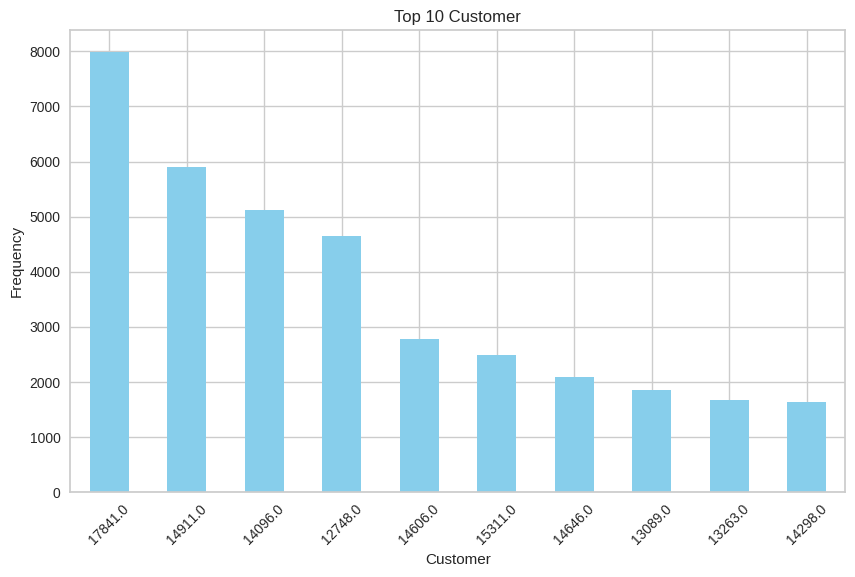

In [17]:
top_10_cust = df['CustomerID'].value_counts().head(10)
print(top_10_cust)

# Menampilkan diagram batang untuk 10 produk teratas
plt.figure(figsize=(10, 6))
top_10_cust.plot(kind='bar', color='skyblue')
plt.title('Top 10 Customer')
plt.xlabel('Customer')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

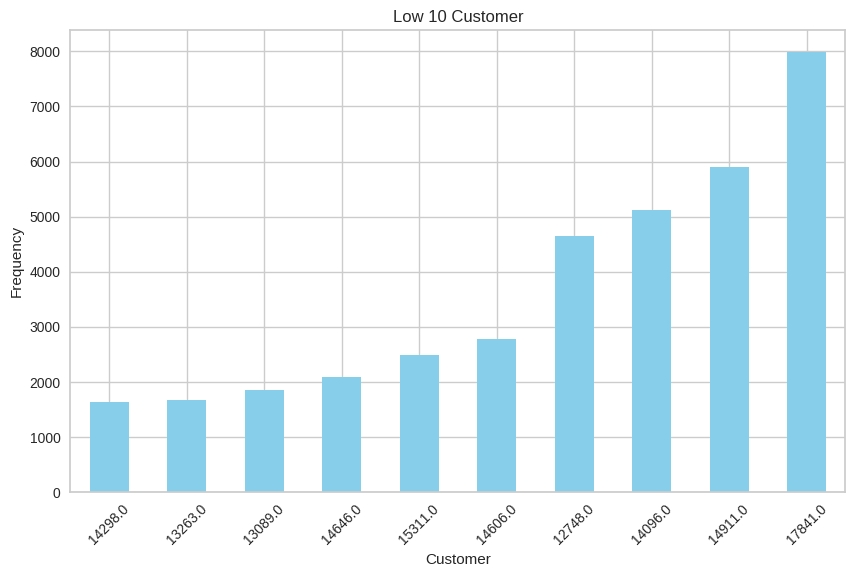

In [18]:
low_10_cust = df['CustomerID'].value_counts().head(10)
# Selecting the bottom 10 products (least sold)
low_10_cust = low_10_cust.nsmallest(10)

# Menampilkan diagram batang untuk 10 produk teratas
plt.figure(figsize=(10, 6))
low_10_cust.plot(kind='bar', color='skyblue')
plt.title('Low 10 Customer')
plt.xlabel('Customer')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# DATA PREPROCESSING

In [19]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [20]:
df.dropna(inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [22]:
df_uk = df[df['Country'] == 'United Kingdom']
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [23]:
df_uk.shape

(356728, 8)

In [24]:
df = df_uk[(df_uk['Quantity']>0)]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [25]:
df.shape

(349227, 8)

In [26]:
print(df['InvoiceDate'].min())
print(df['InvoiceDate'].max())

1/10/2011 10:32
9/9/2011 9:52


In [27]:
NOW = dt.datetime(2011,12,10)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [28]:
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']

In [29]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [30]:
recency_df = df.groupby(['CustomerID'],as_index=False)['InvoiceDate'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18 10:01:00
1,12747.0,2011-12-07 14:34:00
2,12748.0,2011-12-09 12:20:00
3,12749.0,2011-12-06 09:56:00
4,12820.0,2011-12-06 15:12:00


In [31]:
recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x : (NOW - x).days)
recency_df.head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18 10:01:00,325
1,12747.0,2011-12-07 14:34:00,2
2,12748.0,2011-12-09 12:20:00,0
3,12749.0,2011-12-06 09:56:00,3
4,12820.0,2011-12-06 15:12:00,3


In [32]:
recency_df.drop(columns=['LastPurchaseDate'],inplace=True)

In [33]:
frequency_df = df.copy()
frequency_df.drop_duplicates(subset=['CustomerID','InvoiceNo'], keep="first", inplace=True)
frequency_df = frequency_df.groupby('CustomerID',as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,11
2,12748.0,210
3,12749.0,5
4,12820.0,4


In [34]:
monetary_df=df.groupby('CustomerID',as_index=False)['TotalPrice'].sum()
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33053.19
3,12749.0,4090.88
4,12820.0,942.34


In [35]:
rf = recency_df.merge(frequency_df,left_on='CustomerID',right_on='CustomerID')
rfm = rf.merge(monetary_df,left_on='CustomerID',right_on='CustomerID')
rfm.set_index('CustomerID',inplace=True)

In [36]:
rfm1 = rfm.copy()
rfm1.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,11,4196.01
12748.0,0,210,33053.19
12749.0,3,5,4090.88
12820.0,3,4,942.34


In [37]:
std_scaler = StandardScaler()
rfm_scaled = std_scaler.fit_transform(rfm1)
rfm_scaled

array([[ 2.34412669e+00, -4.50546400e-01,  1.00746074e+01],
       [-9.01587778e-01,  9.37411201e-01,  3.12709282e-01],
       [-9.21685081e-01,  2.85577675e+01,  4.17228119e+00],
       ...,
       [-8.51344520e-01, -3.11750640e-01, -2.24682298e-01],
       [-8.91539127e-01,  1.63139000e+00,  2.50882396e-02],
       [-4.99641715e-01, -1.72954880e-01, -2.76465002e-03]])

# MODELING

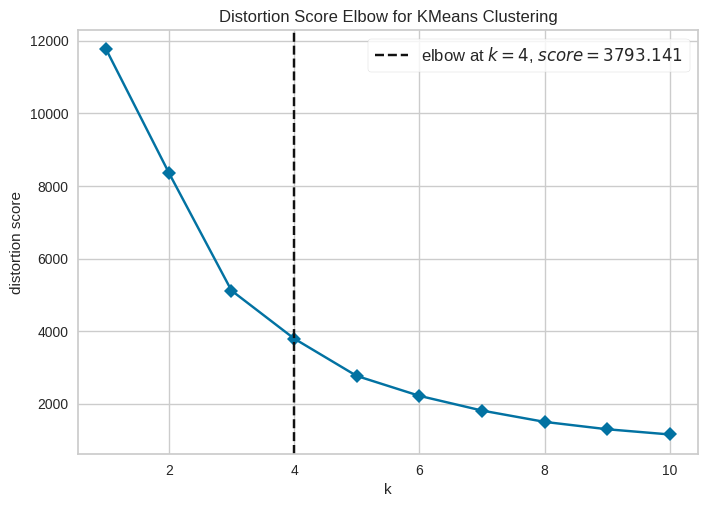

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(rfm_scaled)
visualizer.show()

In [39]:
kmeans = KMeans(n_clusters=4, n_init = 15, random_state=1)
kmeans.fit(rfm_scaled)

KMeans(n_clusters=4, n_init=15, random_state=1)

In [40]:
rfm['cluster'] = kmeans.labels_
rfm.head()

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12346.0,325,1,77183.60,3
12747.0,2,11,4196.01,0
12748.0,0,210,33053.19,3
12749.0,3,5,4090.88,0
12820.0,3,4,942.34,0


# RFM Analysis

In [41]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [42]:
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [43]:
quantile = rfm.quantile(q=[0.25,0.5,0.75])
quantile

,Recency,Frequency,Monetary,cluster
0.25,17.0,1.0,298.11,0.0
0.50,50.0,2.0,644.30,0.0
0.75,142.0,5.0,1570.81,1.0


In [44]:
rfm['R_Quartile'] = rfm['Recency'].apply(RScore,args=('Recency',quantile))
rfm['F_Quartile'] = rfm['Frequency'].apply(FMScore, args=('Frequency',quantile))
rfm['M_Quartile'] = rfm['Monetary'].apply(FMScore, args=('Monetary',quantile))

In [45]:
rfm['RFMScore'] = rfm.R_Quartile.map(str) + rfm.F_Quartile.map(str) + rfm.M_Quartile.map(str)
rfm.head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,3,4,4,1,441
12747.0,2,11,4196.01,0,1,1,1,111
12748.0,0,210,33053.19,3,1,1,1,111
12749.0,3,5,4090.88,0,1,2,1,121
12820.0,3,4,942.34,0,1,2,2,122


In [46]:
rfm['Total_score'] = rfm['R_Quartile'] + rfm['F_Quartile'] + rfm['M_Quartile']
rfm.head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_score
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,3,4,4,1,441,9
12747.0,2,11,4196.01,0,1,1,1,111,3
12748.0,0,210,33053.19,3,1,1,1,111,3
12749.0,3,5,4090.88,0,1,2,1,121,4
12820.0,3,4,942.34,0,1,2,2,122,5


In [47]:
print("Best Customers: ",len(rfm[rfm['RFMScore']=='111']))
print('Loyal Customers: ',len(rfm[rfm['F_Quartile']==1]))
print("Big Spenders: ",len(rfm[rfm['M_Quartile']==1]))
print('Almost Lost: ', len(rfm[rfm['RFMScore']=='134']))
print('Lost Customers: ',len(rfm[rfm['RFMScore']=='344']))
print('Lost Cheap Customers: ',len(rfm[rfm['RFMScore']=='444']))

Best Customers:  423
Loyal Customers:  791
Big Spenders:  980
Almost Lost:  31
Lost Customers:  185
Lost Cheap Customers:  395


# VISUALISASI HASIL ALGORITMA

In [48]:
rfm.head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_score
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,3,4,4,1,441,9
12747.0,2,11,4196.01,0,1,1,1,111,3
12748.0,0,210,33053.19,3,1,1,1,111,3
12749.0,3,5,4090.88,0,1,2,1,121,4
12820.0,3,4,942.34,0,1,2,2,122,5


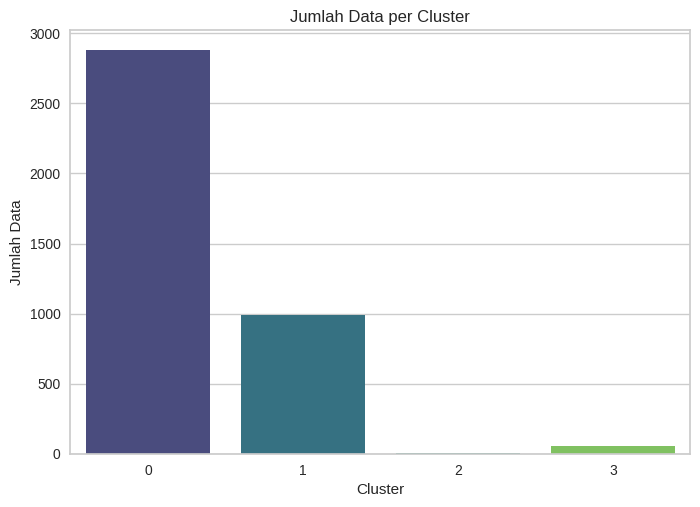

In [49]:
sns.countplot(x='cluster', data=rfm, palette='viridis')
plt.title('Jumlah Data per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.show()

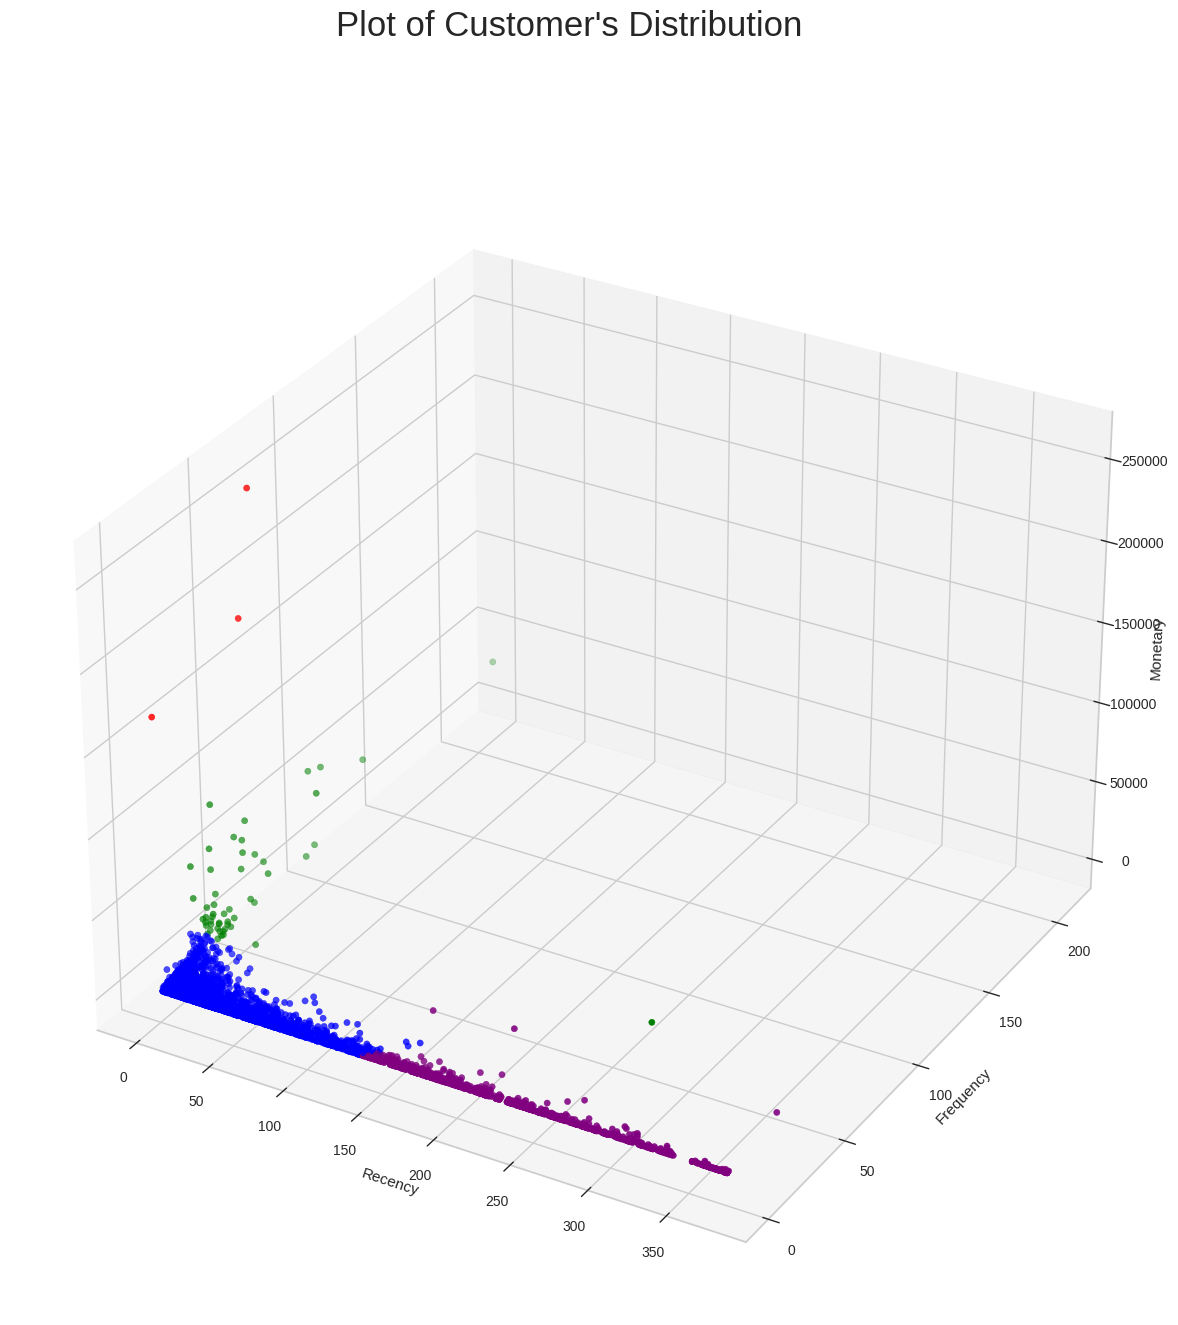

In [50]:
colors = np.array(["blue", "purple","red","green"])
fig  = plt.figure(figsize = (15,15)).suptitle('Plot of Customer\'s Distribution', fontsize=25)
ax = plt.axes(projection='3d')
ax.scatter3D(rfm["Recency"], rfm["Frequency"], rfm["Monetary"], marker='o', c=colors[rfm["cluster"].tolist()])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.legend()
plt.show()

# SAVE MODEL

In [51]:
rfm.head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_score
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,3,4,4,1,441,9
12747.0,2,11,4196.01,0,1,1,1,111,3
12748.0,0,210,33053.19,3,1,1,1,111,3
12749.0,3,5,4090.88,0,1,2,1,121,4
12820.0,3,4,942.34,0,1,2,2,122,5


In [52]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [53]:
rfm.to_excel('hasil_cluster_rfm.xlsx')